<a href="https://colab.research.google.com/github/samuelshoun/Useful-MWEs/blob/main/lognormal_distribution_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install probscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 kB 5.6 MB/s eta 0:00:00


In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
import seaborn as sns
import probscale as ps

In [12]:
# define a function to extract p90/p50/p10 from the best fit line
def swanson_pairs(best_fit_data):
    bfd = best_fit_data
    probs = np.array([.1, .5, .9])
    zs = stats.norm.ppf(probs)
    vals = np.exp((zs - bfd['res']['intercept']) / bfd['res']['slope'])
    return list(zip(vals, probs * 100))

## Options for inputs `x`

In [23]:
# generate lognormally distributed data
x = np.random.lognormal(np.log(85), 0.4, 20)
x

array([176.17380752,  92.4720806 , 115.43262148,  84.28943372,
        43.65974311,  63.97418317,  76.88102171,  80.82298193,
       109.57507722, 128.11660428, 160.16429752,  69.3312941 ,
        69.03040439,  39.29187308, 101.60850271, 109.38985173,
        77.96032037, 161.21989421,  53.32122586,  69.88055308])

In [9]:
# paste data between the quotes
x = (
"""
764049
573906
658946
526291
232534
1208277
399628
50411
399441
98081
344313
278782
84343
325892
51749
513676
958943
565395
1200565
441504
329528
558472
199549
""")
x = x.split('\n')
x = [i for i in x if i!='']
x

['764049',
 '573906',
 '658946',
 '526291',
 '232534',
 '1208277',
 '399628',
 '50411',
 '399441',
 '98081',
 '344313',
 '278782',
 '84343',
 '325892',
 '51749',
 '513676',
 '958943',
 '565395',
 '1200565',
 '441504',
 '329528',
 '558472',
 '199549']

## Fit the line, extract fit parameters, and plot

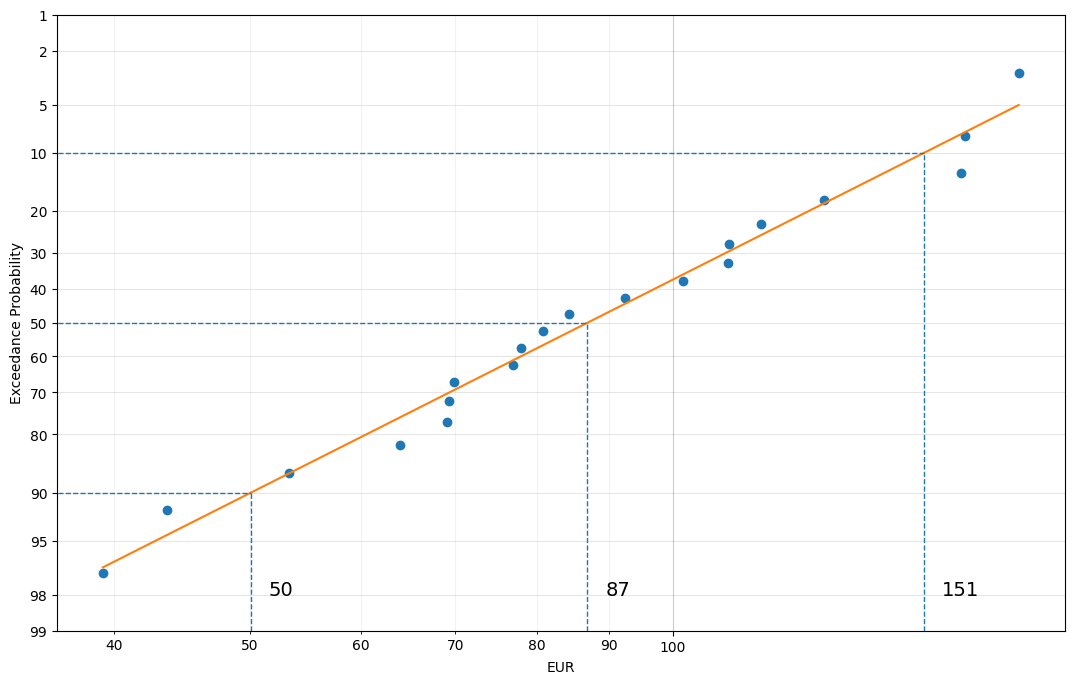

In [24]:
fig, ax = plt.subplots(figsize=(13,8))

_, fit = ps.probplot(x, probax='y', datascale='log', ax=ax, bestfit=True, return_best_fit_results=True)

for i in swanson_pairs(fit):
    ax.vlines(i[0], ymin=1, ymax=i[1], ls='--', lw=1)
    ax.hlines(i[1], xmin=0, xmax=i[0], ls='--', lw=1)
    ax.text(i[0]*1.03, 2, '{:,.0f}'.format(i[0]), fontsize=14)

ax.set_yticks([1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98, 99])
ax.set_yticklabels(100 - ax.get_yticks())

ax.grid(which='major', axis='x', c='k', alpha=.2)
ax.grid(which='minor', axis='x', c='k', alpha=.05)
ax.grid(which='major', axis='y', c='k', alpha=.1)
ax.xaxis.set_minor_formatter(mt.ScalarFormatter())
ax.xaxis.set_major_formatter(mt.ScalarFormatter())
ax.set_ylabel('Exceedance Probability')
ax.set_xlabel('EUR');